[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rejuwan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rejuwan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentiment Categories: ['neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive

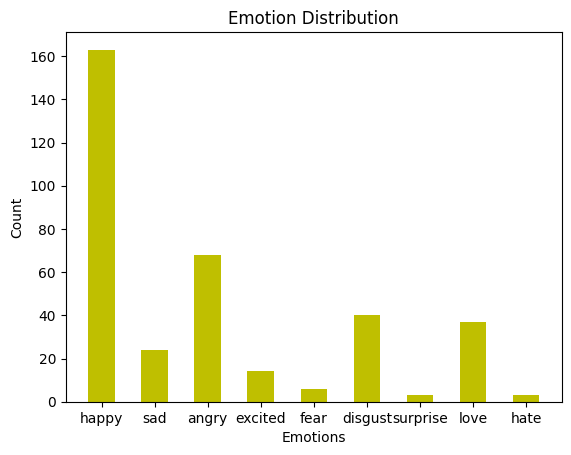

In [5]:
import nltk
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')
nltk.download('stopwords')

def analyze_text(text):
    # Pre-processing: lowercase, remove punctuation and stopwords
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    # Sentiment Analysis
    sentiment_analyzer = SentimentIntensityAnalyzer()
    sentiment_score = sentiment_analyzer.polarity_scores(text)
    sentiment_category = None
    if sentiment_score['compound'] > 0:
        sentiment_category = "positive"
    elif sentiment_score['compound'] < 0:
        sentiment_category = "negative"
    else:
        sentiment_category = "neutral"
    
    # Message Type Analysis
    message_type = None
    if "?" in text:
        message_type = "question"
    elif "!" in text:
        message_type = "exclamation"
    else:
        message_type = "statement"
    
    # Emotion Analysis
    emotion_category = None
    if "happy" in text or "joy" in text or "fun" in text:
        emotion_category = "happy"
    elif "sad" in text or "depressed" in text or "unhappy" in text:
        emotion_category = "sad"
    elif "angry" in text or "frustrated" in text or "mad" in text:
        emotion_category = "angry"
    elif "excited" in text or "eager" in text or "enthusiastic" in text:
        emotion_category = "excited"
    elif "fear" in text or "scared" in text or "afraid" in text:
        emotion_category = "fear"
    elif "disgust" in text or "dislike" in text or "hate" in text:
        emotion_category = "disgust"
    elif "surprise" in text or "shocked" in text or "amazed" in text:
        emotion_category = "surprise"
    elif "love" in text or "affection" in text or "passion" in text:
        emotion_category = "love"
    elif "hate" in text or "dislike" in text or "anger" in text:
        emotion_category = "hate"
    
    return sentiment_category, message_type, emotion_category

def read_file_and_analyze_text(file_path):
    # Read the file
    with open(file_path, 'r') as file:
        messages = file.readlines()
    
    # Analyze the messages
    sentiment_categories = []
    message_types = []
    emotion_categories = []
    for message in messages:
        sentiment, msg_type, emotion = analyze_text(message)
        sentiment_categories.append(sentiment)
        message_types.append(msg_type)
        emotion_categories.append(emotion)
    
    return sentiment_categories, message_types, emotion_categories

def plot_emotion_distribution(emotion_categories):
    emotions = ["happy", "sad", "angry", "excited", "fear", "disgust", "surprise", "love", "hate"]
    emotion_counts = {}
    for emotion in emotions:
        emotion_counts[emotion] = emotion_categories.count(emotion)
    
    # Plot the bar chart
    plt.bar(emotion_counts.keys(), emotion_counts.values(), color='y', width=0.5)
    plt.xlabel("Emotions")
    plt.ylabel("Count")
    plt.title("Emotion Distribution")
    plt.show()

# Main Function
if __name__ == '__main__':
    file_path = "chat.txt"
    sentiment_categories, message_types, emotion_categories = read_file_and_analyze_text(file_path)
    print("Sentiment Categories:", sentiment_categories)
    print("Message Types:", message_types)
    print("Emotion Categories:", emotion_categories)
    plot_emotion_distribution(emotion_categories)
